In [1]:
#Importing main library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_table('D:\Study\BA\TEST\data_banknote_authentication.txt',sep=',',header=0,names=['VOWTI','SOWTI','KOWTI','EOI','class'])

In [4]:
#looking into the data

In [5]:
data.describe()

,VOWTI,SOWTI,KOWTI,EOI,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
data.head()

,VOWTI,SOWTI,KOWTI,EOI,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VOWTI   1371 non-null   float64
 1   SOWTI   1371 non-null   float64
 2   KOWTI   1371 non-null   float64
 3   EOI     1371 non-null   float64
 4   class   1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
data.nunique()

VOWTI    1337
SOWTI    1255
KOWTI    1269
EOI      1156
class       2
dtype: int64

In [10]:
#finding out the Outliers

In [11]:
object = ['object']
cat = data.select_dtypes(object)

In [12]:
cat.columns

Index([], dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VOWTI   1371 non-null   float64
 1   SOWTI   1371 non-null   float64
 2   KOWTI   1371 non-null   float64
 3   EOI     1371 non-null   float64
 4   class   1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


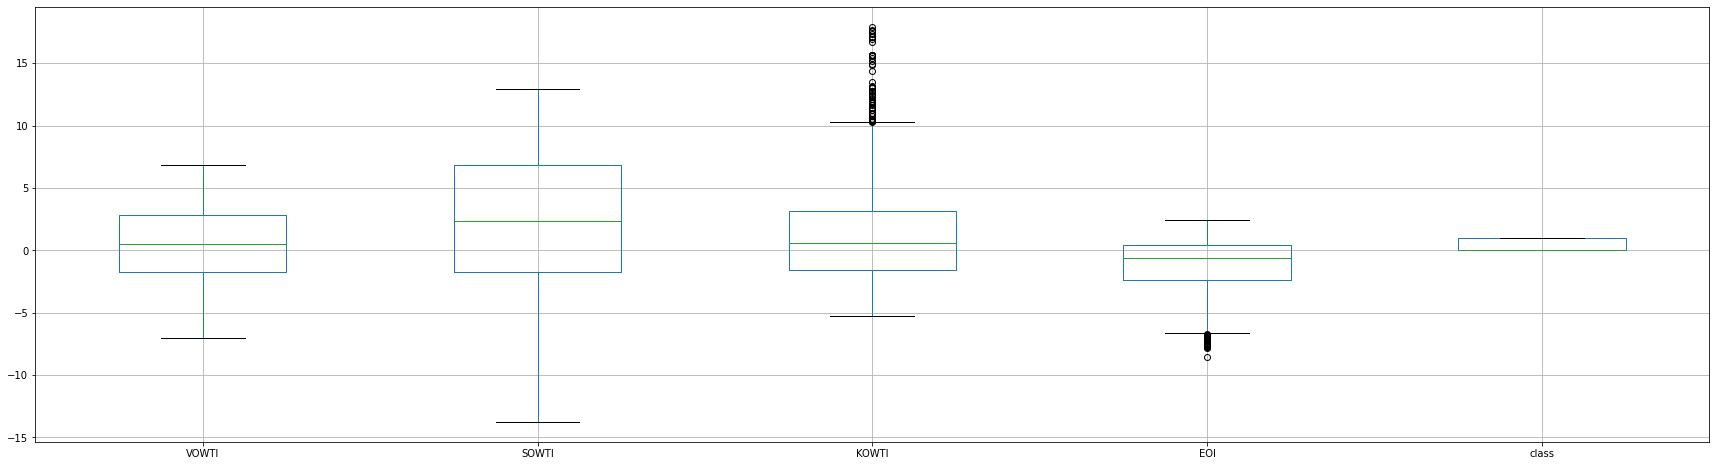

In [14]:
data.boxplot(figsize=(30,8))

In [15]:
#Fixing of Outlier

In [16]:
data1 = data.drop('class',axis=1)

In [17]:
#outlier Treatment
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

In [18]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [19]:
dataclean = data1[(data1>lower_limit)&(data1<upper_limit)]

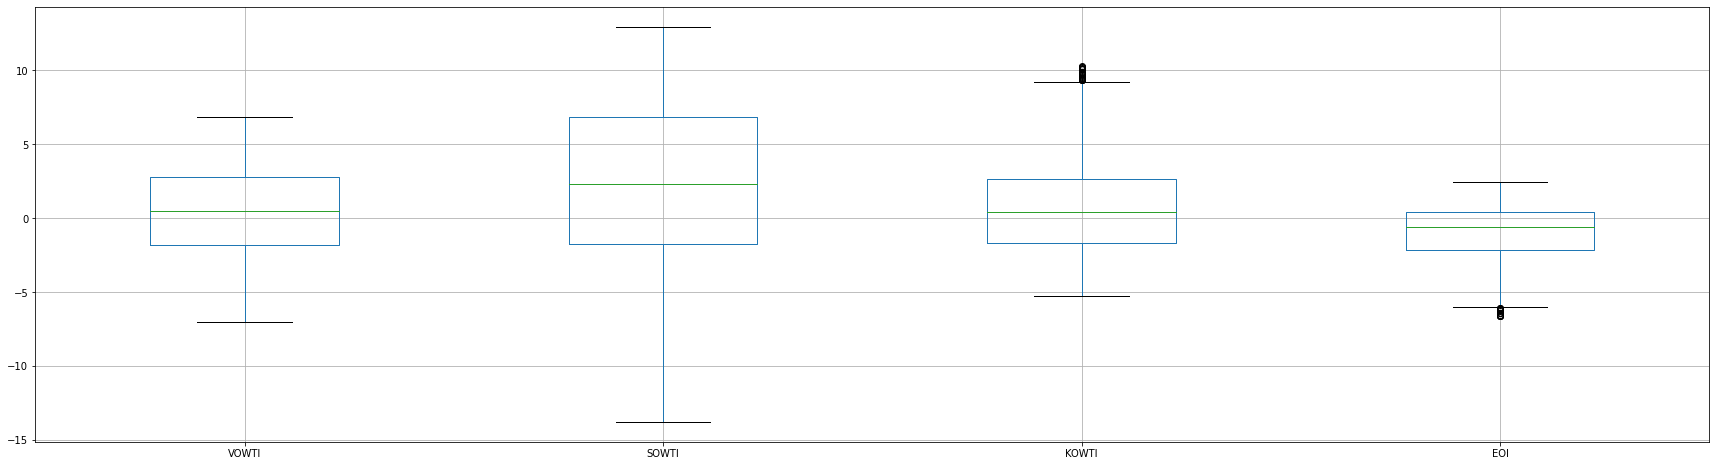

In [20]:
dataclean.boxplot(figsize=(30,8))

In [21]:
target = data["class"]
final = dataclean.join(target)

In [22]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VOWTI   1371 non-null   float64
 1   SOWTI   1371 non-null   float64
 2   KOWTI   1311 non-null   float64
 3   EOI     1338 non-null   float64
 4   class   1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [23]:
#making model

In [24]:
X = final.drop(columns='class',axis=1)
Y = final.iloc[:,-1:]

In [25]:
#X = data1.drop(['class'],axis=1)
#Y = data1['class']

In [26]:
X.shape,Y.shape

((1371, 4), (1371, 1))

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1096, 4), (275, 4), (1096, 1), (275, 1))

In [29]:
#setting Hyper-parameters

In [30]:
params={
    "n_estimators"  : [100,200,300],
    "max_depth"     : [4,6,8,10],
    "learning_rate"  : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "min_child_weight" : [ 1, 3, 5, 7],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [32]:
classifier=XGBClassifier()

In [33]:
random_search=RandomizedSearchCV(classifier,param_distributions=params)

In [34]:
random_search.fit(x_train,y_train)

C:\Users\Shaurya\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [35]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
random_search.best_params_

{'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [38]:
#applying best variables

In [37]:
classifier=XGBClassifier(
n_estimators=200,
min_child_weight=1, 
max_depth=6, 
learning_rate=0.1,
gamma=0.0, 
colsample_bytree=0.5)

In [38]:
model = classifier
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set)

[0]	validation_0-error:0.07208	validation_0-logloss:0.62108	validation_1-error:0.12000	validation_1-logloss:0.62969
[1]	validation_0-error:0.06387	validation_0-logloss:0.56140	validation_1-error:0.11273	validation_1-logloss:0.57717
[2]	validation_0-error:0.05201	validation_0-logloss:0.54129	validation_1-error:0.10909	validation_1-logloss:0.56091
[3]	validation_0-error:0.04745	validation_0-logloss:0.52437	validation_1-error:0.11273	validation_1-logloss:0.54691
[4]	validation_0-error:0.04745	validation_0-logloss:0.47741	validation_1-error:0.09455	validation_1-logloss:0.50662
[5]	validation_0-error:0.04836	validation_0-logloss:0.43746	validation_1-error:0.09818	validation_1-logloss:0.47217
[6]	validation_0-error:0.04836	validation_0-logloss:0.40310	validation_1-error:0.10545	validation_1-logloss:0.44237
[7]	validation_0-error:0.04288	validation_0-logloss:0.39251	validation_1-error:0.09818	validation_1-logloss:0.43477
[8]	validation_0-error:0.03558	validation_0-logloss:0.35779	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
result = model.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy = accuracy_score(result, y_test)

In [42]:
accuracy

0.9927272727272727

In [43]:
scoretrain = model.score(x_train,y_train)

In [44]:
scoretrain

1.0

In [45]:
scoretest = model.score(x_test,y_test)

In [46]:
scoretest

0.9927272727272727

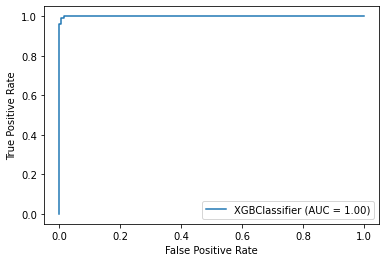

In [47]:
#Ploting Area under the Curve
from sklearn.metrics import plot_roc_curve
xgbgraph = plot_roc_curve(model, x_test, y_test)
xgbgraph

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_test,result)

In [50]:
cm

array([[146,   2],
       [  0, 127]], dtype=int64)

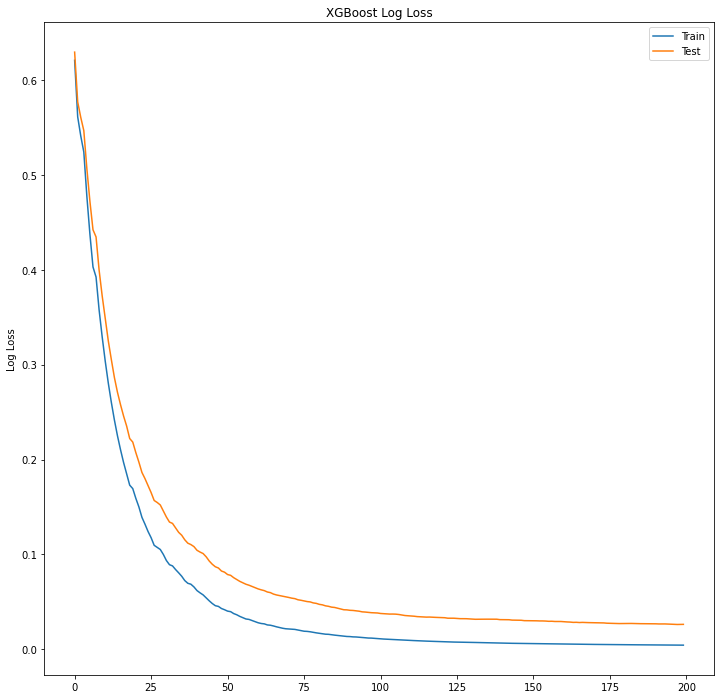

In [51]:
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    
    # plot log loss
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()

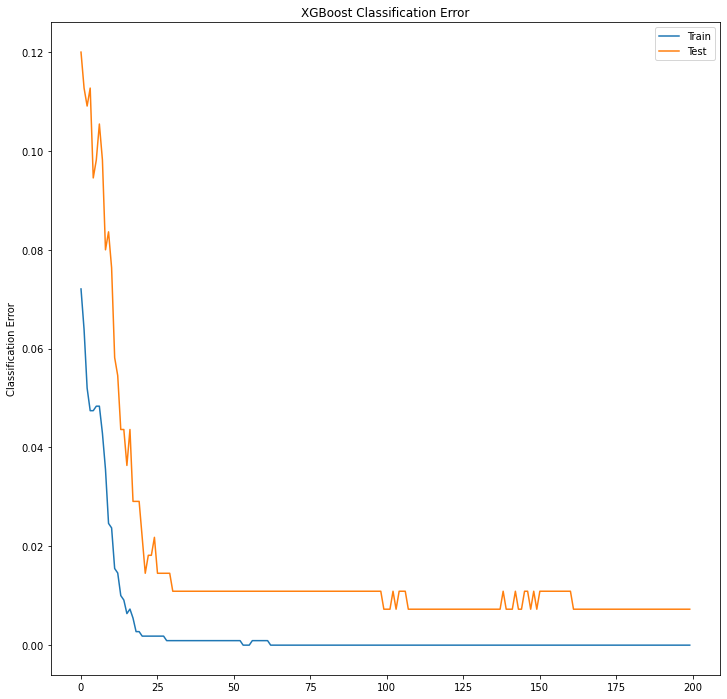

In [52]:
    # plot classification error
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()